<a href="https://colab.research.google.com/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



<h1>The Used Cars Dataset Modelling</h1>

###Jashneet Kaur
###jks888@uregina.ca, Id 200380410
###University of Regina
###Spring / Summer 2019


## INTRODUCTION

###Scikit Algorithm 
I have an option of using three scikit algorithms from the figure provided in the assignment. I can select any one from the three algorithms, either Lasso or Linear or Ridge Regression.

###Process and Justification
I have started to look for the algorithm from the provided figure itself. I have traced the figure with my requirements with the following steps:
####1: started and I have more than 50 dataset values
####2: I am not predicting a category. I am working on to predict a quantity that is I am analysing the statics of car pricing factors.
####3: I have less than 100k data set values so i move further in that direction from the figure.
####4: Now a few features are important to predict the car price like its transmission, odometer value, and year of manufacturing. 
####5: I am a little confused while choosing the few features or more features for the car price prediction. Hence, I have decided to implement the Lasso algorithm, Linear Regression and the Ridge regression algorithm to see the prediction outcomes. In the end I will choose one from the three algorithms, the one with better r square values. So I have three modelling algorithms to implement in the upcoming sections.
####6 Firstly I have mounted my gdrive and then accessed the input data file CarList.csv. Then worked on the data cleaning just like assignment 3. Once the data is ready I have applied the three algorithms one by one.
#### Linear Regression
####  Ridge Regression
####  Lasso

  

NOTE: Here is a link to the file for better visuals : 
https://nbviewer.jupyter.org/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Data_Modelling.ipynb

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive

/content/gdrive


In [0]:
cd My Drive

/content/gdrive/My Drive


In [0]:

#Importing the required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#read the file data into a ledger variable
ledger = pd.read_csv('CarList.csv') 


In [0]:
#delete the columns
del ledger["url"]
del ledger["city_url"]
del ledger["VIN"]
del ledger["image_url"]
del ledger["condition"]
del ledger["manufacturer"]
del ledger["make"]
del ledger["fuel"]
del ledger["transmission"]
del ledger["desc"]
del ledger["lat"]
del ledger["long"]
del ledger["size"]
del ledger["type"]
del ledger["drive"]
del ledger["paint_color"]

In [0]:
data = ledger

#I have used the dropna command for all the rows where even any one column value is missing.
data = data.dropna()

#delete the rows where year < 1980 and price < 2000 
data.drop(data[data.price < 2000].index, inplace = True)
data.drop(data[data.year < 1980].index, inplace = True)
data.sort_values(["year"], ascending=False, inplace=True)
data.drop(data[data.price > 65000].index, inplace = True)
data.drop(data[data.odometer < 20000].index, inplace = True)
data.drop(data[data.odometer > 100000].index, inplace = True)

#sorted the listings by the year of manufacture in descending order
data = data.reset_index(drop=True)

Text(0.5, 1.0, 'Fig 1 : Car price vs count of listings for that price')

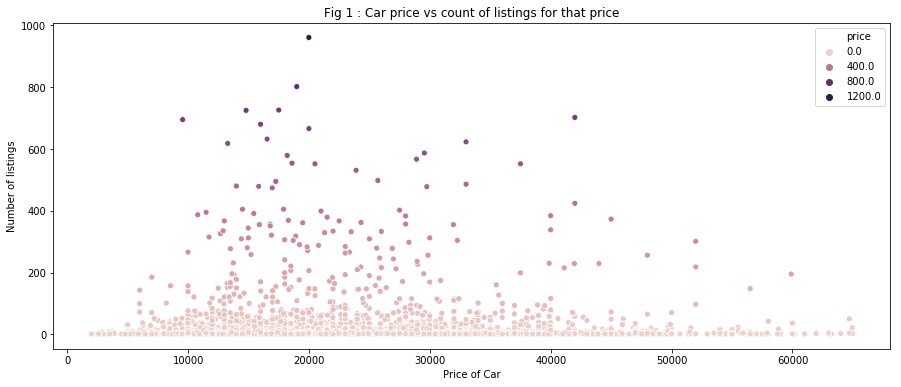

In [0]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="price", y=data['price'].value_counts(), hue=data['price'].value_counts(), data=data)
plt.xlabel("Price of Car")
plt.ylabel("Number of listings")
plt.title("Fig 1 : Car price vs count of listings for that price")

In [0]:
#taking only required columns in variables

odoyear = data[['year', 'odometer']]
price = data['price']

X_train, X_test, y_train, y_test = train_test_split(price, odoyear, test_size=0.2, random_state=0)

price_val = X_train
year_odo = y_train

price_test= X_test
yearodo_test = y_test

x_odometer = year_odo.drop(['year'],axis=1)
x_year = year_odo.drop(['odometer'],axis=1)

In [0]:
#Creating principal component DataFrame for the columns 'year' and 'odometer'
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(year_odo)
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component', ])
principalDf.head(5)



,principal component
0,30243.481699
1,-28480.518768
2,20519.480292
3,17577.481575
4,-4668.518599


In [0]:
#Creating principal component DataFrame for the interpolation testing
principalComponentstest = pca.fit_transform(yearodo_test)
principalDf_test = pd.DataFrame(data = principalComponentstest,
                          columns = ['principal component test', ])

Implementing the Ridge regression and calculating the R squared  value for comparison

In [0]:
ridge = Ridge()

ridge.fit(principalDf, price_val)

price_predicted = ridge.predict(principalDf)

# model evaluation
rmse = mean_squared_error(price_val, price_predicted)
r2 = r2_score(price_val, price_predicted)

# printing values
print('Slope:' ,ridge.coef_)
print('Intercept:', ridge.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [0.1692632]
Intercept: 17359.66685811285
Root mean squared error:  84665590.51506826
R2 score:  0.1589893251154717


Implementing the Lasso and calculating the R squared value for comparison



In [0]:
lasso = Lasso()

lasso.fit(principalDf, price_val)

price_predicted = lasso.predict(principalDf)

# model evaluation
rmse = mean_squared_error(price_val, price_predicted)
r2 = r2_score(price_val, price_predicted)

# printing values
print('Slope:' ,lasso.coef_)
print('Intercept:', lasso.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [0.1692632]
Intercept: 17359.66685811285
Root mean squared error:  84665590.51506828
R2 score:  0.1589893251154716


# ALGORITHM APPLICATION

From all the algorithms the R square values of all the algorithms are approximately same. However R suare of the linear regression is a little better so I have decided to implement the Linear regression model.
###Algorithm Working
Linear Regression is a machine learning algorithm that helps to map independent numeric value inputs to a dependent numeric value output. Once the model is trained then it is able to predict the output values based on the inputs provided. It finds the line that best fits the data points on a graph. This line helps us to see the trend of the output values and we could predict the output values which are not present in our dataset. The simple linear regression equation is: Ε(y) = (β0 +β1 x).
This equation gives us the line that fits on the data plots. (Gigi, 2019)

###Implementation
To implement the linear regression in scikit, firstly I have imported the required libraries and then used the LinearRegression method provided in the scikit linear model class. I have reduced the dimentions of the independent data set by using the principal component method PCA. Now I have 2 dimentional dataset with which I can train the linear regression model by calling the 'fit' method. I have created another variable that uses the 'predict()' function to create a predicted value of the price when the input of year and odometer value is given. (Scikit, 2019) 

###Model Creation 
The linear regression model is created during the algorithm implementation and then I have plotted the actual values in a scatterplot and the predicted values in a linear line graph. The plot helps in understanding the trend of increase in price as the independent values change.

###Data Preparation
For the test data I am going to use the data values that I have had removed initially during data cleaning process. I will use those data values to check the predicting accuracy of the algorithm. 

For training the model I have used the cleaned dataset values after removing the outliers and the values which were not helpful in training the model. The independent values of odometer and year were converted to a single dimension by using the PCA method. this helped in performing the model training and in plotting the datasets. From the clean data I have used only 80% of the data for training an drest 20% I will use to perform the testing and check accuracy for interpolation.

Implementing the Linear regression and calculating the R squared  value for comparison

Slope: [0.1692632]
Intercept: 17359.66685811285
Root mean squared error:  84665590.51506826
R2 score:  0.1589893251154717


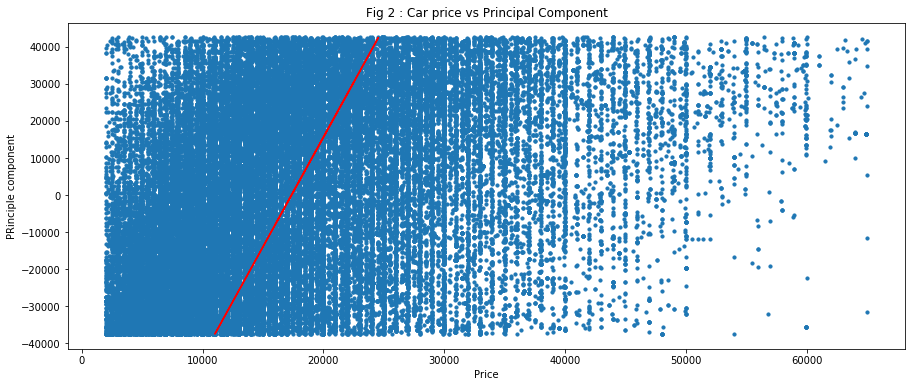

In [0]:
lin_reg = LinearRegression()

lin_reg.fit(principalDf, price_val)

price_predicted = lin_reg.predict(principalDf)

# model evaluation
rmse = mean_squared_error(price_val, price_predicted)
r2 = r2_score(price_val, price_predicted)

# printing values
print('Slope:' ,lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
plt.figure(figsize=(15,6))
# data points
plt.scatter(price_val, principalDf, s=10,)
plt.xlabel('Price')
plt.ylabel('Principal Component')
plt.title("Fig 2 : Car price vs Principal Component")
# predicted values
plt.plot(price_predicted, principalDf, color='r')
plt.show()

**********************************************************************************************

# VISUALIZATION

###Data Visualization
For better understanding of the change in predicted values I have plotted the scatter plot against the odometer values and price values and a linear graph using the predicted values against the odometer values.
Simillary I have visualized the scatterplot using the year and price values and a line graph using the predicted values against the year values. This will help in understanding the change in predicted values based on both the independent variables.
The linear regression plot of the principal component and the price is shown above. That graph includes the predicted line using both the year and odometer values.

###Labelling 
In all the three plots the Price has been plotted on the x-axis, whereas the y axis values change with respect to the second component used for plotting. The graph labelling is done and the title has been given for each one of them for ease in recognition of the plotted values.

###Data Plotting
Data plotting gives us some significant information. In Fig 2, we can see that with the increase in value of principal component, the car prices afre increasing. And from the below plots, Fig 3 and 4 we can see that with the old manufactured cars are available for less price and the cars with high value of odometer is available for less price. The outcomes from the plotting gives better understanding of the prediction line.

###Regression statistical values
I have calculated the Linear regression equation in the Excel sheet and it is as shown:
1.54*x + (-22650). 
The R squared values for the linear regression and other important information shows that the algorithm may not be a best fit but it can still make predictions.
####Slope: [0.1692632]
####Intercept: 17359.66685811285
####Root mean squared error:  84665590.51506826
####R2 score:  0.1589893251154717



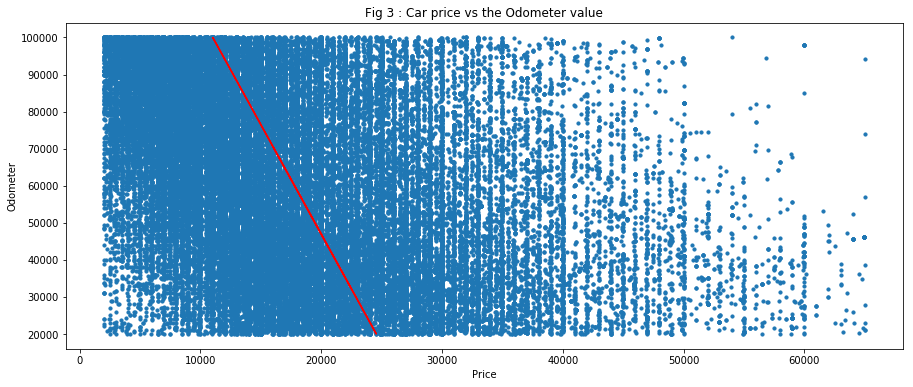

In [0]:
lin_reg_odo = LinearRegression()

lin_reg_odo.fit(x_odometer, price_val)

price_predicted_odo = lin_reg_odo.predict(x_odometer)

# plotting values
plt.figure(figsize=(15,6))
# data points
plt.scatter( price_val,x_odometer, s=10)
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title("Fig 3 : Car price vs the Odometer value")
# predicted values
plt.plot( price_predicted_odo, x_odometer, color='r')
plt.show()

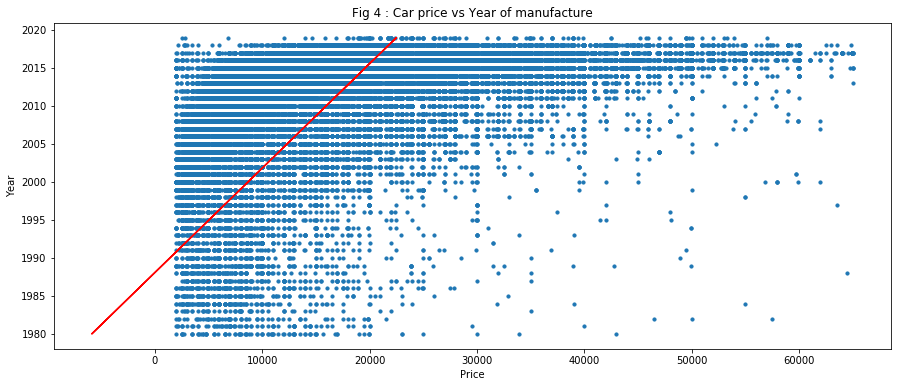

In [0]:
lin_reg_year = LinearRegression()

lin_reg_year.fit(x_year, price_val)

price_predicted_year = lin_reg_year.predict(x_year)

# plotting values
plt.figure(figsize=(15,6))

# data points
plt.scatter( price_val,x_year, s=10)
plt.xlabel('Price')
plt.ylabel('Year')
plt.title("Fig 4 : Car price vs Year of manufacture")
# predicted values
plt.plot( price_predicted_year,x_year, color='r')
plt.show()

# DISCUSSION

###Model Implications
The model is not the best fit for the analysis but still it can make good predictions. the r square value is only 15% states that 15% proportion of variability in the outcome is explained by the model. It is because of the large amount of data. The input data can be refined and standardized for improvement in results. 
It would have been better to categorize the data based on the car brands and manufacturer and make. Then on each cluster we can perform the linear regression. The implementation of two different algorithms could have provided us better results.

###Fictional Instance
For the testing I have a set of data separated from the actual data. Also I have the scrapped data in another set to perform the testing on model.

###Potential accuracy in interpolation and extrapolration
For interpolation I am going to test the 20% of the data that I had separated in the beginning of the notebook to check the accuracy of predictions. Once I have predicted the prices based on test data I will plot a bar chart to see the actual and predicted values. This data set will have price values within 2000 and 65000, year of make greater than 1980 and odometer values greater than 2000 but lesser than 10,000.

Also I will test some of the data that I had scrubbed in the beginning to check the extrapolation prediction values. The model was not trained with the extrapolation values so I will use those data values and predict the price. This data set will have price values greater than 80,000 dollars and the year of make greater than 2010 and the odometer values greater than 2000.

The bar chat of the actual and predicted values shows that the model is very good in predicting values of a certain range (interpolation) but if the values are relatively higher or lower than the average values then the predictions are not accurate. Considering a few exceptions, the model is working fine for the predictions.

Since the model was not trained with the extrapolation values, hence it is not able to predict the price of cars for the values which were not fed to the model during the training. from the bar chart it is very clear that the predicted values were far lesser than the actual price values of those cars.

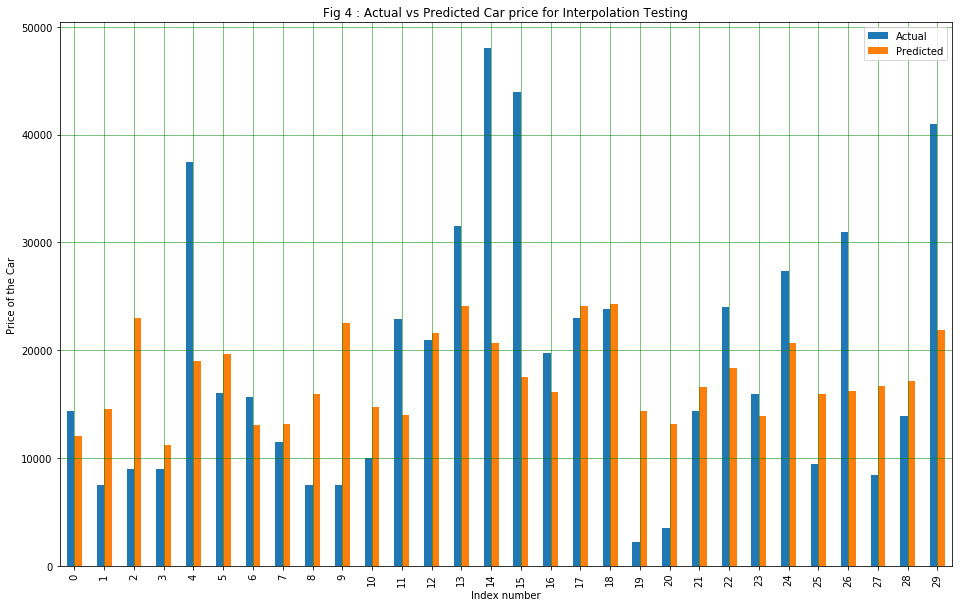

In [0]:
#using the 20% of teh data set values for interpolation testing
price_predicted_test = lin_reg.predict(principalDf_test)

# plotting the actual vs predicted prices for Interpolation
df = pd.DataFrame({'Actual': price_test, 'Predicted': price_predicted_test})
df = df.reset_index(drop=True)
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Index number')
plt.ylabel('Price of the Car')
plt.title("Fig 4 : Actual vs Predicted Car price for Interpolation Testing")
plt.show()

In [0]:
#Extrapolation Testing Dataset
extrapol = ledger

#I have used the dropna command for all the rows where even any one column value is missing.
extrapol = extrapol.dropna()

#delete the rows where year < 2000 and price < 65000 
extrapol.drop(extrapol[extrapol.year < 2010].index, inplace = True)
extrapol.drop(extrapol[extrapol.price < 65000].index, inplace = True)
extrapol.drop(extrapol[extrapol.odometer < 20000].index, inplace = True)

extrapol.sort_values(["year"], ascending=False, inplace=True)

#sorted the listings by the year of manufacture in descending order
extrapol = extrapol.reset_index(drop=True)

In [0]:
#taking only required columns in variables

extra_yearodo = extrapol[['year', 'odometer']]
extra_price = extrapol['price']

#Creating principal component DataFrame for the extrapolation testing
principalComponentsextra = pca.fit_transform(extra_yearodo)
principalDf_extra = pd.DataFrame(data = principalComponentsextra,
                          columns = ['principal component extrapolation', ])
#print(principalDf_test.head(5))
#print(principalDf_extra.head(5))

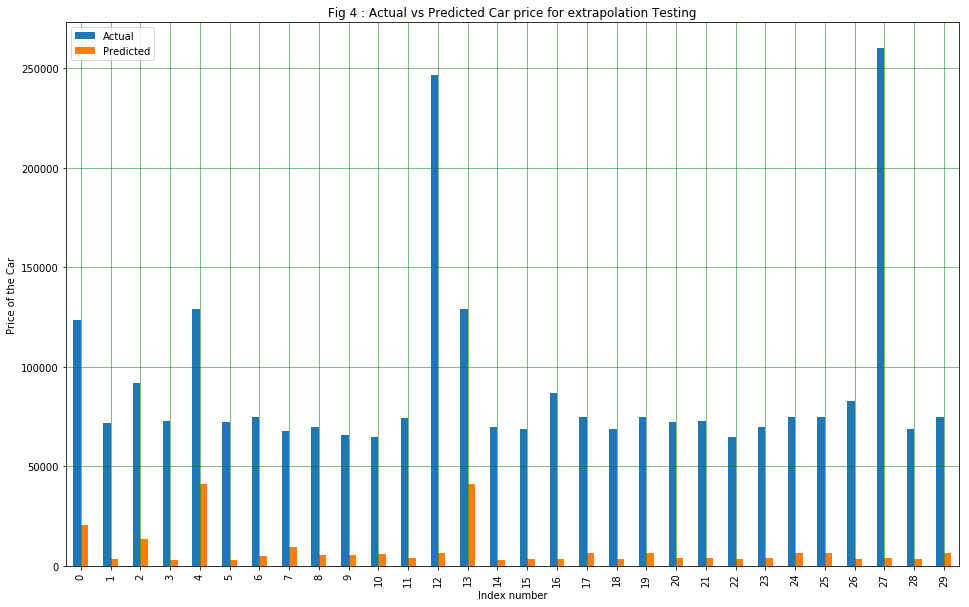

In [0]:
#using the scrubbed data for extrapolation testing
price_predicted_extrapol = lin_reg.predict(principalDf_extra)

# plotting the actual vs predicted prices for Interpolation
dfe = pd.DataFrame({'Actual': extra_price, 'Predicted': price_predicted_extrapol})
dfe = dfe.reset_index(drop=True)

df2 = dfe.head(30)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Index number')
plt.ylabel('Price of the Car')
plt.title("Fig 4 : Actual vs Predicted Car price for extrapolation Testing")
plt.show()

# SUMMARY

###Conclusion
Linear regression model is able to predict the outcomes with only 15% proportional variance explanation. It is not a good value and it happened because of the large amount of data. The data was cleaned and outliers were removed but still it was a huge dataset for linear regression to get the accurate predictions. The two independent values of year and odometer were used to make a prediction of dependent value of price for a car. SO the two independent variables were combined to form a one dimentional dataset called teh principal component. The Linear regression model was trained with the principal component as input variable. When the model was trained with the clean data set, it was able to predict the car prices. The actual dataset was plotted as a scatterplot and the predicted regression  outcome was plotted in a line graph to see and understand the prediction of outcome. When the interpolation testing was carried by feeding the data set similar to the data set used for training, the predictions were almost correct. But the model was a complete failure when extrapolation data set values were fed to the system. Hence I have came to a conclusion that when the R square value is closer to zero then this model is not the best approach for predicting the car prices but however it can make good predictions for the input values of a certain range. 
The goal of the notebook was to predict the used car's price and this implementation works absolutely fine for the inputs of a certain range.


###Future Aspects 
The prediction outcomes can be greatly enhanced by dividing the dataset into different dataframes based on their car maker and manufacturer. This means if we implement the classification algorithm on huge data sets then it will be easy to make accurate predictions on smaller and related datasets. The small dataframes can be further analyzed by implementing the regression algorithms. This would enhance the prediction outcomes.
Also, the huge dataset can be cleaned based on the year of make of the cars and its driving conditions. This would help in training the model with appropriate input values and hence it would help in getting accurate predictions.

###Knowledge gathered
The models created during the implementation of Linear and Ridge regression and the Lasso algorithm, have enhanced my knowledge of using the machine learning algorithms with data analysis. The implementation of car price prediction model have helped me in predicting a car price based on its year of make and its odometer value. This is going to be very useful for me whenever I will plan to  buy a car.

# REFERENCES

Austin Reese (2019) "Used Cars Dataset" Vehicles listings from Craigslist.org. Available at: https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/7.


Tomesh, T. (2019). titanic.ipynb. Available at: https://colab.research.google.com/drive/1KftGp4lGzd7PJuKWq9qDv3xnxiQbwhwY#scrollTo=Y2tOGJ2UYPVi [Accessed 16 Aug. 2019].


Stach Overflow (2019) Available at https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame [Accessed 17 Aug 2019]


TutorialsPoint (2019 )Available at https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.html [Accessed 18 Aug 2019]


Chris ALbon (2017), "Using Seaborn To Visualize A pandas Dataframe"  Available at: https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/  [Accessed 18 Aug 2019]


Marco Peixeiro (2019), "How to Perform Lasso and Ridge Regression in Python" Available at: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8
[Accessed 25 Aug 2019]

Gigi Devault (2019) "What Simple Linear Regression Is and How It Works" Available at: https://www.thebalancesmb.com/what-is-simple-linear-regression-2296697

Scikit Learn (2019) "Linear Regression Example" Available at:https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
